# Network Science H21: Assignment 2: 
# Statistical Properties of Graphs (by Zheng Luo 21-738-901)

In [1]:
import networkx as nx
import numpy as np
import os
import re
import copy
import matplotlib.pyplot as plt

## Definition of functions

In [2]:
# define randomization function to perform Degree-preserving network randomisation
def randomize(graph):
    graph_rand = copy.deepcopy(graph) # as nx.alo.swap/rand_ref shuffles in place
                            # perform deep copy to preserve the original graph
    n_links = graph.number_of_edges() # count the number of links
    graph_rand = nx.algorithms.smallworld.random_reference(graph_rand,niter = 10 * n_links, connectivity=False)
                                                        # set #trials to be 10* n_links
    # implemeting nx.algo.swap might imply some challenges as it's not trivial to find the number of swaps to fully alternate a network
    # graph_rand = nx.algorithms.swap.double_edge_swap(graph, 20)
                                        # shuffle in place for num_links swaps
    return graph_rand

In [3]:
# define a function to plot 𝑘𝑛𝑛(𝑘) as a function of the vertices degree 𝑘
def plt_knn(graph):
    knn_list = [j for i,j in nx.average_degree_connectivity(graph).items()] # unpack the degrees to a list from dict
    my_bins = np.logspace(np.log10(min(knn_list)), np.log10(max(knn_list) + 1), 30) # binning to facilitate mapping
    _ = plt.hist(knn_list, bins = my_bins, density = True)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Knn(k) distribution')
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.show()

In [4]:
# define a function to calculate and print the Assortativity Coefficient
def cal_assort(graph):
    assort = nx.degree_assortativity_coefficient(graph)
    print(f'The Assortativity Coefficient is {assort}')

In [5]:
# define a function to plot degree dist. in log-log scale & mark with a vertical line the average degree ⟨𝑘⟩
def plt_dgr(graph):
    # Nodes & Degrees: unpack its nodes into a list
    nodes = [i for i in graph.nodes()]
    d = [graph.degree(i) for i in nodes]
    
    # calculate avg_dgr
    avg_d = sum(d) / len(d)
    
    # plot the degree dist.
    my_bins = np.logspace(np.log10(min(d)), np.log10(max(d) + 1), 30) # binning
    _ = plt.hist(d, bins = my_bins, density = True)
    plt.axvline(avg_d, color='k', linestyle='dashed', linewidth=1) # mark with a vertical line the average degree ⟨𝑘⟩
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Degree Distribution')
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.show()

In [6]:
# define a function to calculate the clustering coefficient w.r.t each node of a network
def cal_cc(graph):
    # Clustering Coefficients: unpack the dict type result into a list and return the list
    cc_list = [j for i,j in nx.clustering(graph).items()]
    return cc_list

In [7]:
# define a function to plot 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖) in scatter plot
def plt_compare_cc(g1, g2, xl = 'C(i)', yl = 'C_rand(i)'):
    # Nodes & Degrees: unpack its nodes & degrees into lists
    n1 = [i for i in g1.nodes()]
    n2 = [i for i in g2.nodes()]
    c1 = cal_cc(g1)
    c2 = cal_cc(g2)
    # plot degrees of g1 & g2 in a scatter plot
    _ = plt.scatter(c1, c2)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(f'Scatter plot of {xl} vs. {yl}')
    plt.show()

## Test with a small network

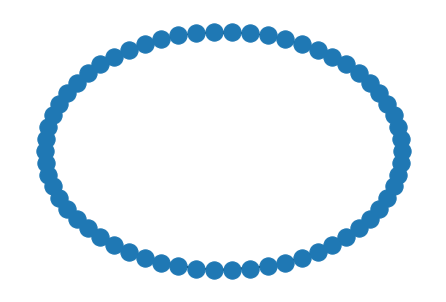

In [8]:
# generate a small network and check it
#g = nx.generators.small.krackhardt_kite_graph()
g = nx.generators.triangular_lattice_graph(30,2)
nx.draw(g, pos = nx.circular_layout(g))

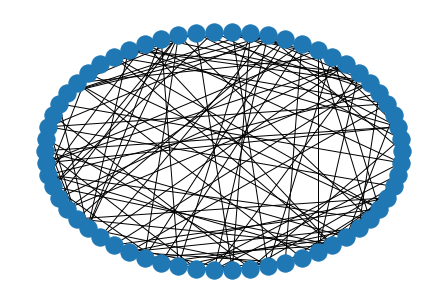

In [9]:
# randomize the kite and check again
g_rand = randomize(g)
nx.draw(g_rand, pos = nx.circular_layout(g_rand))

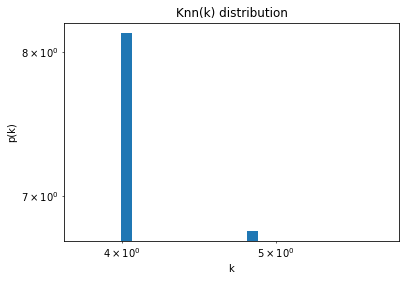

The Assortativity Coefficient is -0.49593495934959186


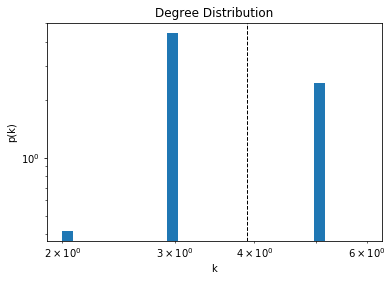

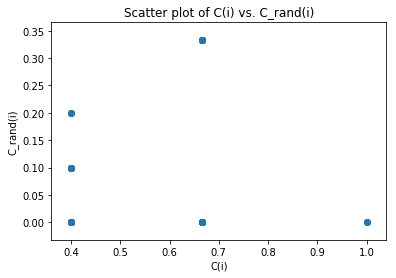

In [10]:
plt_knn(g)
cal_assort(g)
plt_dgr(g)
cal_cc(g)
plt_compare_cc(g, g_rand)

## A02.1 Average degree of the nearest neighbours
### Task: For each dataset 𝒢, randomise it to obtain a net-work 𝒢𝑟𝑛𝑑 and explore their assortativity properties
1. Plot the average degree of the nearest neighbours $𝑘_{nn}(𝑘)$ as a function of the vertices degree 𝑘
2. Compute the assortativity coefficient of the real network
3. Compute the assortativity coefficient of the randomised network

## A02.2 Clustering and randomisation
### For each dataset 𝒢 , randomise it to obtain a network 𝒢𝑟𝑛𝑑 and explore their clustering properties
1. Plot the degree distribution in double-log scale and mark with a vertical line the average degree ⟨𝑘⟩ 
2. For each node, compute the clustering coefficient in the graphs 𝒢 (denoted by 𝐶(𝑖)) and 𝒢𝑟𝑛𝑑 (denoted as 𝐶𝑟𝑛𝑑(𝑖)) 
3. Do a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)

----------The analysis of network No.0----------
For the original network graph_AstroPh.gml


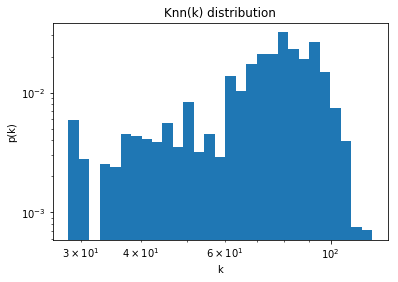

The Assortativity Coefficient is 0.20131706127372678


For the randomized network graph_AstroPh_random.gml


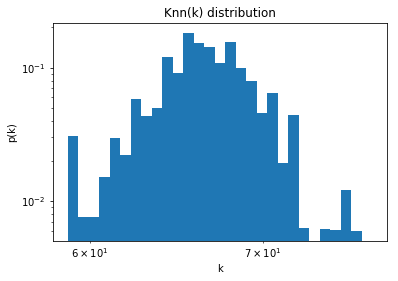

The Assortativity Coefficient is 0.016786718783262843



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_AstroPh.gml


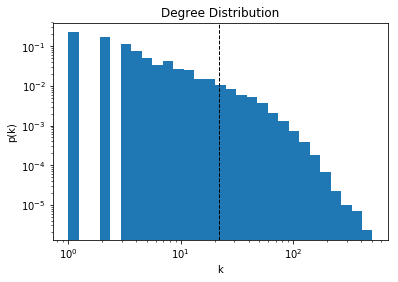


For the randomized network graph_AstroPh_random.gml


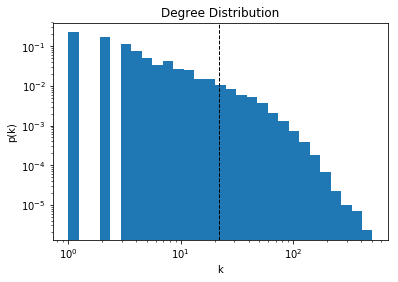

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


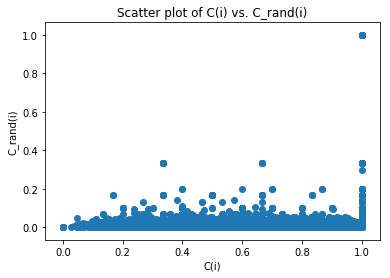

----------The analysis ends----------



----------The analysis of network No.1----------
For the original network graph_CondMat.gml


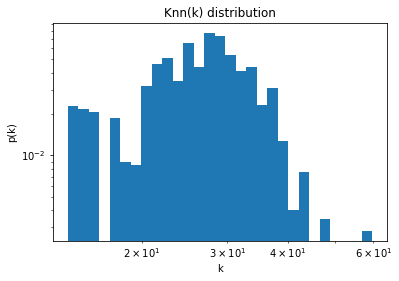

The Assortativity Coefficient is 0.12528250398544855


For the randomized network graph_CondMat_random.gml


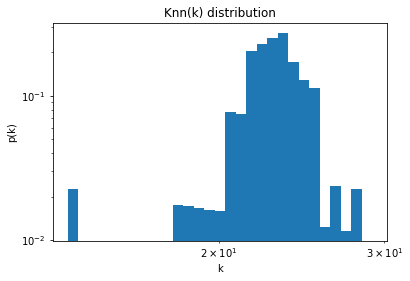

The Assortativity Coefficient is 0.010626136622392294



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_CondMat.gml


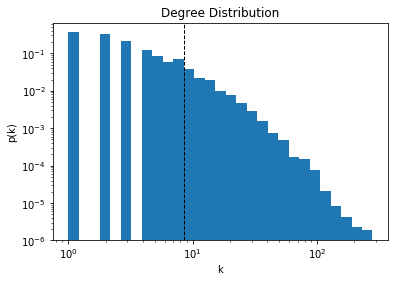


For the randomized network graph_CondMat_random.gml


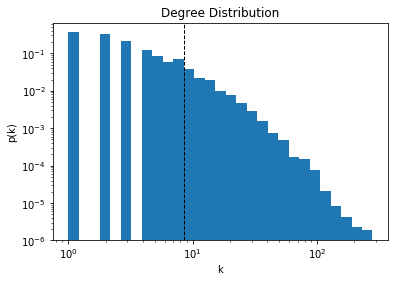

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


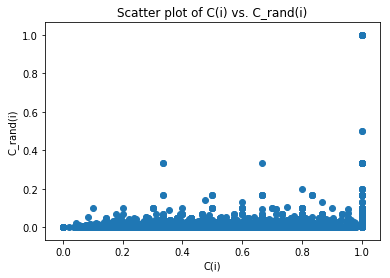

----------The analysis ends----------



----------The analysis of network No.2----------
For the original network graph_celegansInteractomes.gml


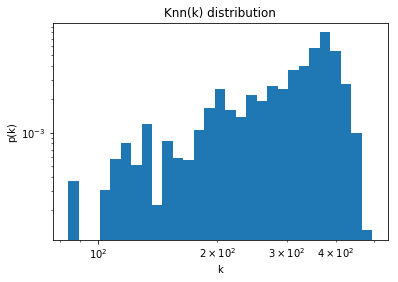

The Assortativity Coefficient is 0.15169796960230705


For the randomized network graph_celegansInteractomes_random.gml


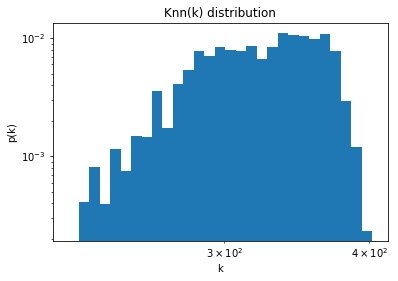

The Assortativity Coefficient is -0.16041270078807657



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_celegansInteractomes.gml


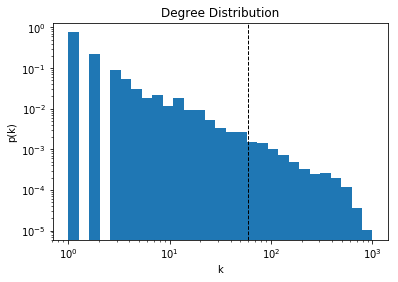


For the randomized network graph_celegansInteractomes_random.gml


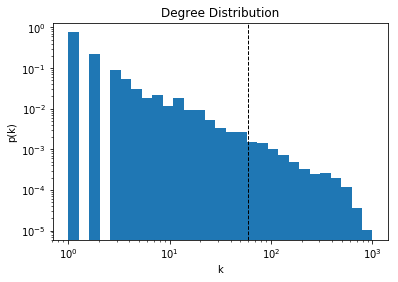

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


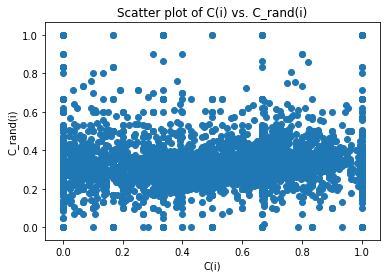

----------The analysis ends----------



----------The analysis of network No.3----------
For the original network graph_chess.gml


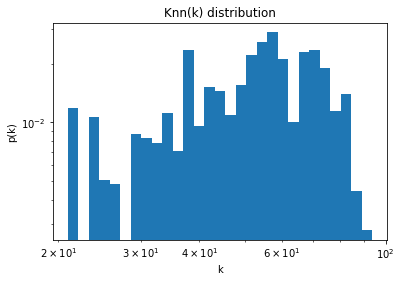

The Assortativity Coefficient is 0.3705153782729769


For the randomized network graph_chess_random.gml


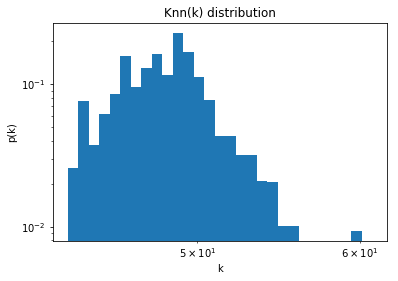

The Assortativity Coefficient is 0.040416830465474146



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_chess.gml


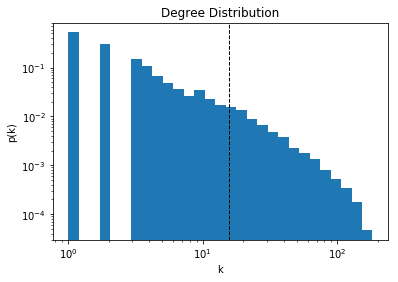


For the randomized network graph_chess_random.gml


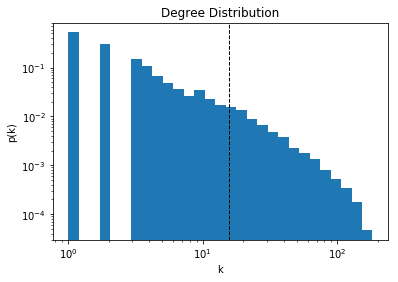

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


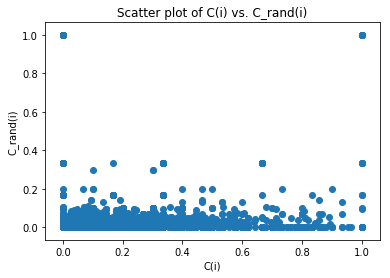

----------The analysis ends----------



----------The analysis of network No.4----------
For the original network graph_dolphins.gml


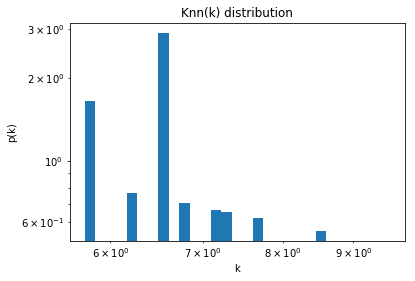

The Assortativity Coefficient is -0.04359402821531255


For the randomized network graph_dolphins_random.gml


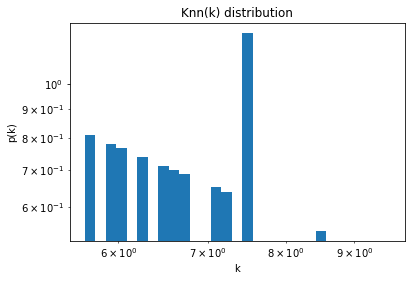

The Assortativity Coefficient is -0.1559676756608678



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_dolphins.gml


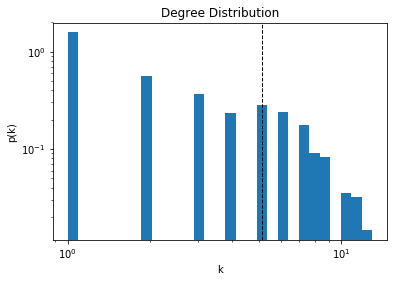


For the randomized network graph_dolphins_random.gml


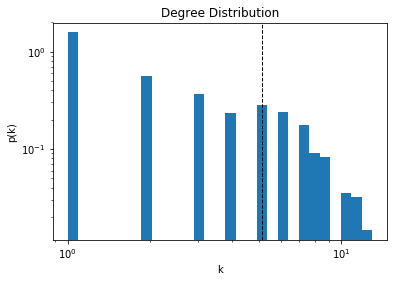

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


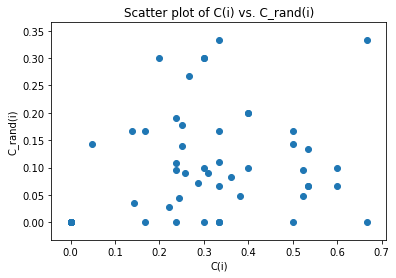

----------The analysis ends----------



----------The analysis of network No.5----------
For the original network graph_eu_airlines.gml


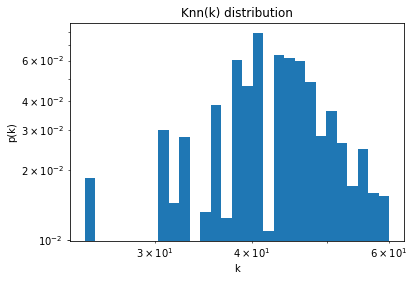

The Assortativity Coefficient is -0.15180413274193835


For the randomized network graph_eu_airlines_random.gml


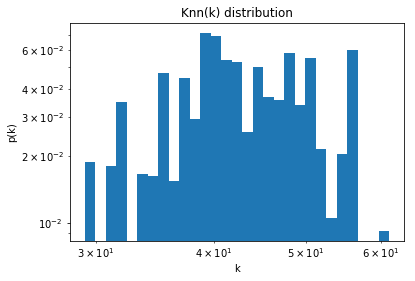

The Assortativity Coefficient is -0.2239276234409445



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_eu_airlines.gml


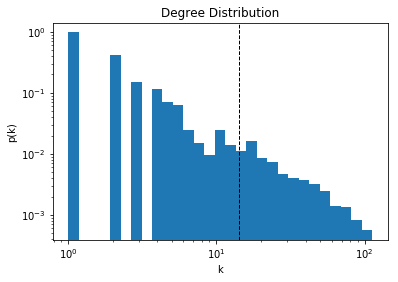


For the randomized network graph_eu_airlines_random.gml


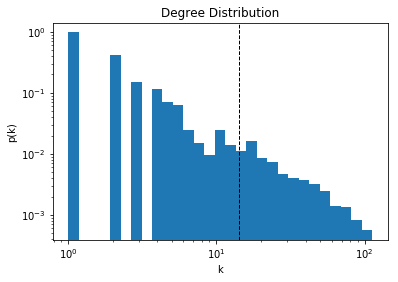

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


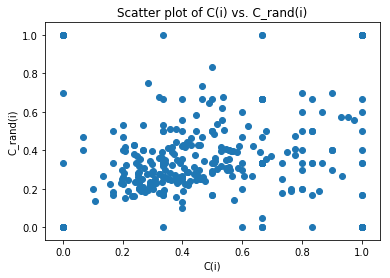

----------The analysis ends----------



----------The analysis of network No.6----------
For the original network graph_facebook.gml


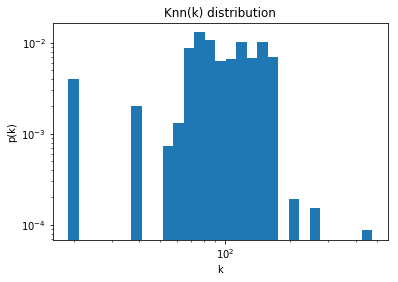

The Assortativity Coefficient is 0.06357722918564943


For the randomized network graph_facebook_random.gml


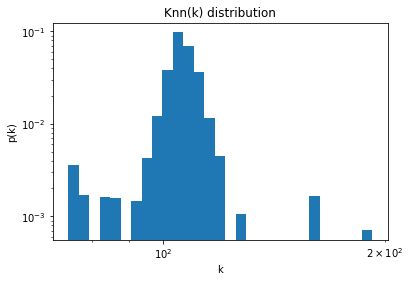

The Assortativity Coefficient is -0.03469329042239886



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_facebook.gml


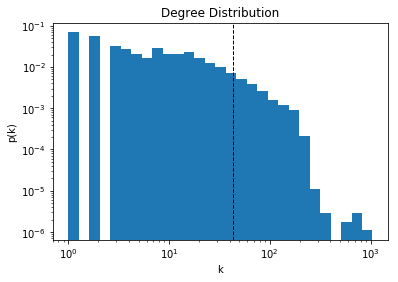


For the randomized network graph_facebook_random.gml


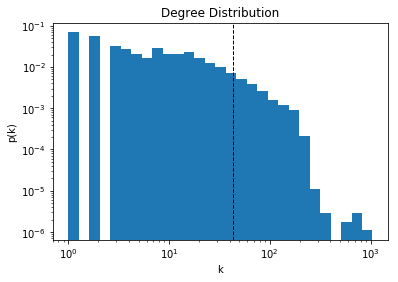

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


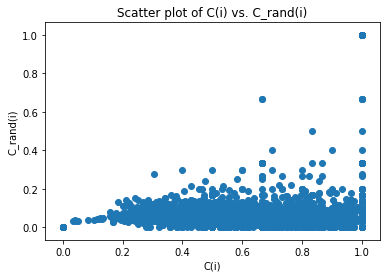

----------The analysis ends----------



----------The analysis of network No.7----------
For the original network graph_florentine_families.gml


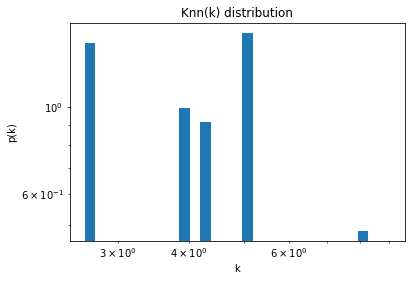

The Assortativity Coefficient is -0.47862867319679353


For the randomized network graph_florentine_families_random.gml


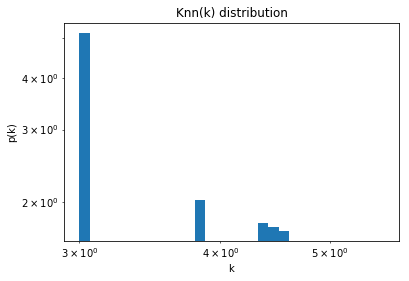

The Assortativity Coefficient is -0.009795191451470196



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_florentine_families.gml


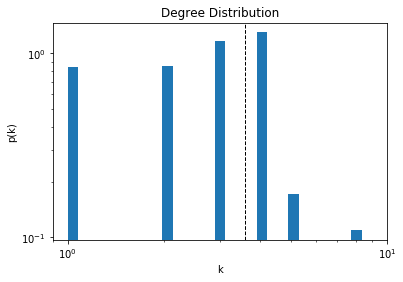


For the randomized network graph_florentine_families_random.gml


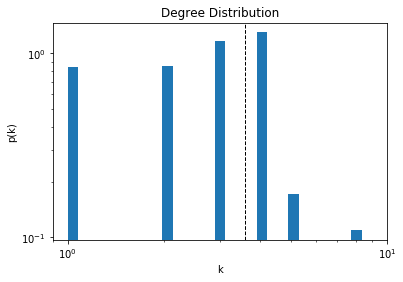

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


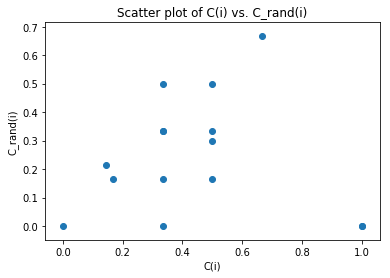

----------The analysis ends----------



----------The analysis of network No.8----------
For the original network graph_game_thrones.gml


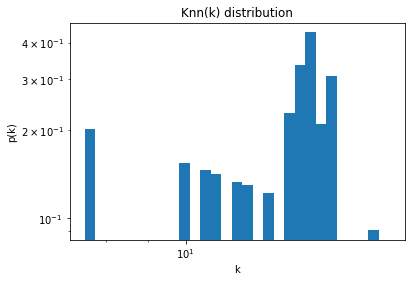

The Assortativity Coefficient is -0.1307696836693023


For the randomized network graph_game_thrones_random.gml


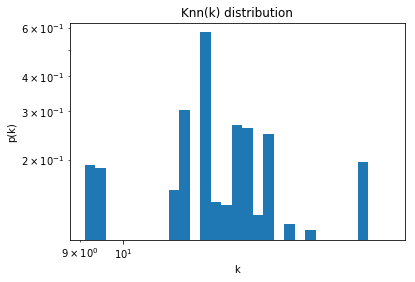

The Assortativity Coefficient is -0.1632265736574731



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_game_thrones.gml


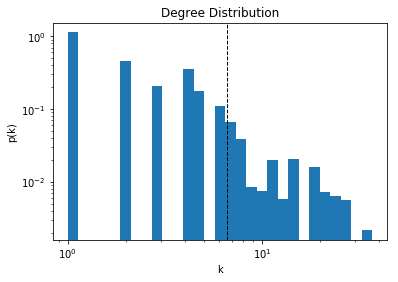


For the randomized network graph_game_thrones_random.gml


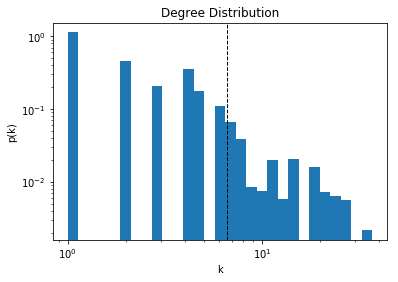

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


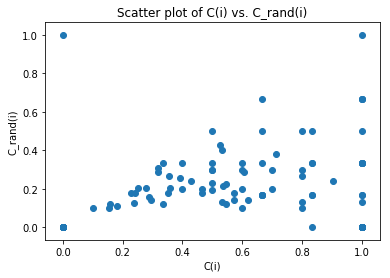

----------The analysis ends----------



----------The analysis of network No.9----------
For the original network graph_internet.gml


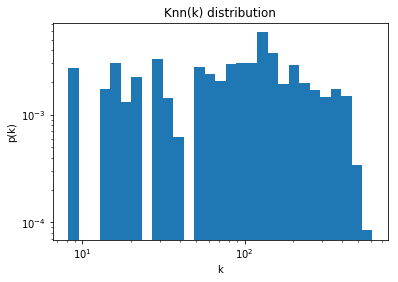

The Assortativity Coefficient is -0.21486656615730235


For the randomized network graph_internet_random.gml


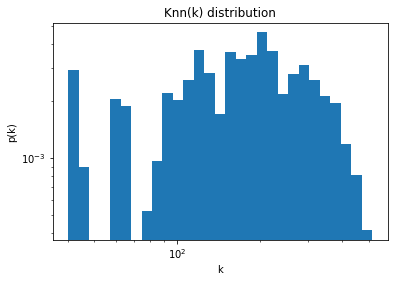

The Assortativity Coefficient is -0.19778189898717918



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_internet.gml


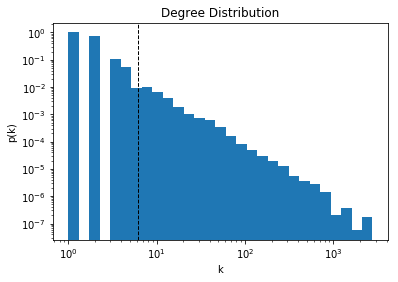


For the randomized network graph_internet_random.gml


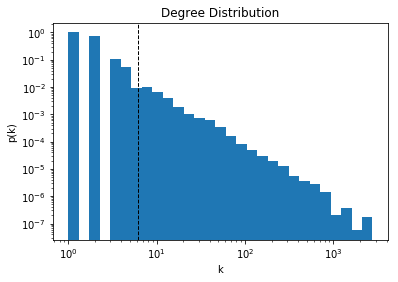

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


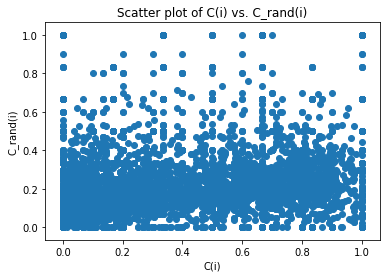

----------The analysis ends----------



----------The analysis of network No.10----------
For the original network graph_jazz_collab.gml


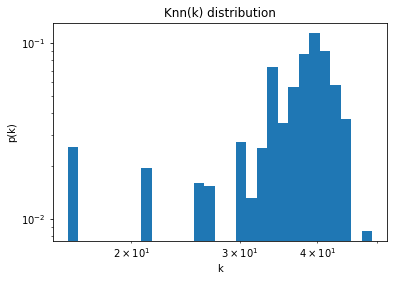

The Assortativity Coefficient is 0.020237399275047713


For the randomized network graph_jazz_collab_random.gml


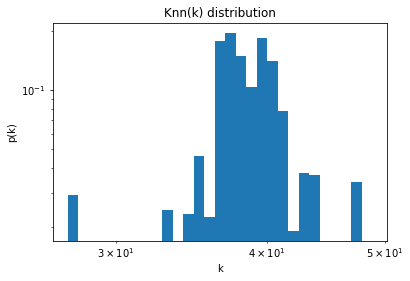

The Assortativity Coefficient is -0.07266930692131228



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_jazz_collab.gml


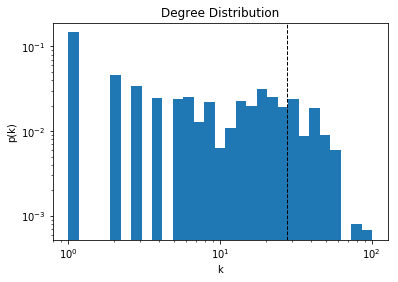


For the randomized network graph_jazz_collab_random.gml


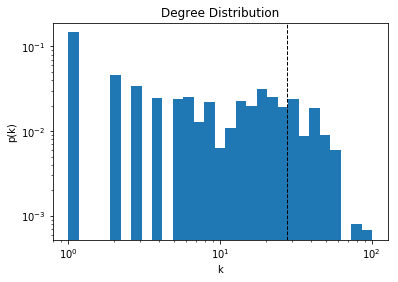

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


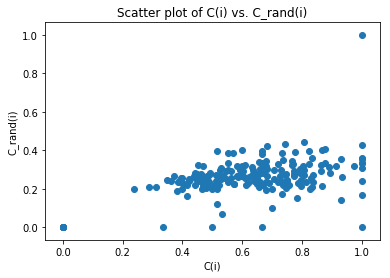

----------The analysis ends----------



----------The analysis of network No.11----------
For the original network graph_terrorists.gml


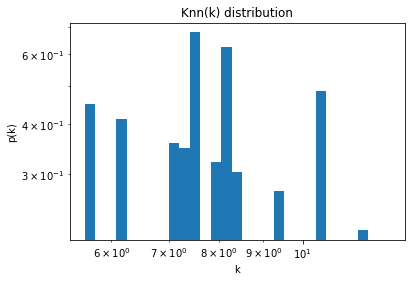

The Assortativity Coefficient is -0.08047566178575725


For the randomized network graph_terrorists_random.gml


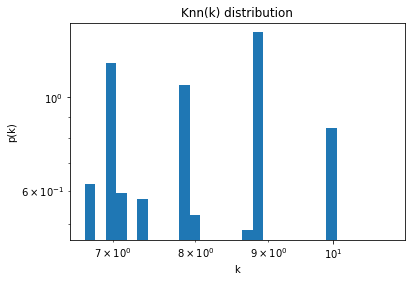

The Assortativity Coefficient is -0.07177241971636257



Now compare the first-order property (degree) of the original and the randomized networks)
For the original network graph_terrorists.gml


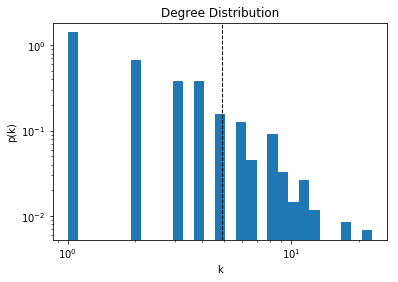


For the randomized network graph_terrorists_random.gml


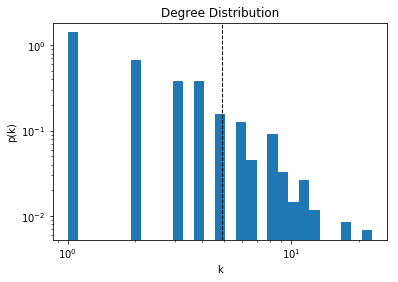

Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)


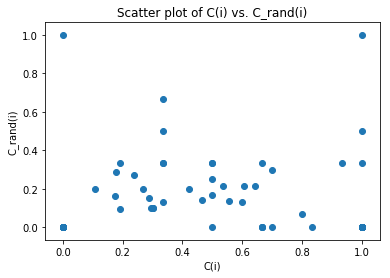

----------The analysis ends----------





In [11]:
# load the original networks
cwd = os.getcwd()
g_folder = f'{cwd}/data/'
g_list = os.listdir(g_folder)
g_list.sort()
# load the randomized networks
g_rand_folder = f'{cwd}/data_random/'
g_rand_list = os.listdir(g_rand_folder)
g_rand_list.sort()
for i in range(len(g_list)):
    print(f'----------The analysis of network No.{i}----------')
    g = nx.read_gml(f'{g_folder}'+ str(g_list[i]))
    g_rand = nx.read_gml(f'{g_rand_folder}'+ str(g_rand_list[i]))
    
    print(f'For the original network {g_list[i]}')
    # A02.1.1.plot knn w.r.t. k
    plt_knn(g)
    # A02.1.2. compute the assortativity coefficient of the real
    cal_assort(g)
    
    print (f'\n\nFor the randomized network {g_rand_list[i]}')
    # A02.1.1.plot knn w.r.t. k
    plt_knn(g_rand)
    # A02.1.3. compute the assortativity coefficient of the randomized
    cal_assort(g_rand)
    
    ########
    print (f'\n\n')
    ########
    
    # A02.2.1. plot the log-log degree distribution and mark the <k>
    print(f'Now compare the first-order property (degree) of the original and the randomized networks')
    print(f'For the original network {g_list[i]}')
    plt_dgr(g)
    print (f'\nFor the randomized network {g_rand_list[i]}')
    plt_dgr(g_rand)
    
    # A02.2 & 3 compute C(i) and C_rand(i) for each node in the above-mentioned networks & plot scatter
    print(f'Now compare a high-order property (Clustering Coefficient) by plotting C(i) against Crand(i)')
    plt_compare_cc(g, g_rand) 
    print(f'----------The analysis ends----------\n\n\n')